In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [17]:
q_er_df = pd.read_csv('/home/dlhogan/data/CONFLUENCE_data/domain_East_River_lumped/observations/streamflow/preprocessed/East_River_lumped_streamflow_processed.csv')
q_er_df.head()

,datetime,discharge_cms
0,2010-03-06 00:00:00,1.546097
1,2010-03-06 01:00:00,1.534063
2,2010-03-06 02:00:00,1.497959
3,2010-03-06 03:00:00,1.497959
4,2010-03-06 04:00:00,1.473889


In [18]:
# add a day of water year to the dataframe
def day_of_water_year(date):
    """Calculate the day of the water year for a given date."""
    year = date.year
    start_of_water_year = pd.Timestamp(year, 10, 1)  # Water year starts on October 1
    if date < start_of_water_year:
        start_of_water_year = pd.Timestamp(year - 1, 10, 1)  # Adjust for previous year if before October 1
    return (date - start_of_water_year).days  
test_dowy = day_of_water_year(pd.Timestamp('2023-09-30'))
print(f"Day of water year for 2023-01-01: {test_dowy}")

q_er_df['dowy'] = q_er_df['datetime'].apply(lambda x: day_of_water_year(pd.Timestamp(x)))

# groupby mean dowy
q_er_dowy_mean = q_er_df.groupby('dowy')['discharge_cms'].agg(['mean','std'])

Day of water year for 2023-01-01: 364


In [31]:
q_er_df_2024 = q_er_df[(pd.to_datetime(q_er_df['datetime']) >= '2023-10-01') & 
              (pd.to_datetime(q_er_df['datetime']) < '2024-10-01')].groupby('dowy')['discharge_cms'].agg(['mean'])

q_er_df_2025 = q_er_df[(pd.to_datetime(q_er_df['datetime']) >= '2024-10-01') & 
              (pd.to_datetime(q_er_df['datetime']) < '2025-10-01')].groupby('dowy')['discharge_cms'].agg(['mean'])

In [32]:
q_er_df_2025

,mean
dowy,
0,3.166467
1,3.093020
2,3.019839
3,2.801298
4,2.704815
...,...
269,8.852245
270,8.148454
271,7.855552


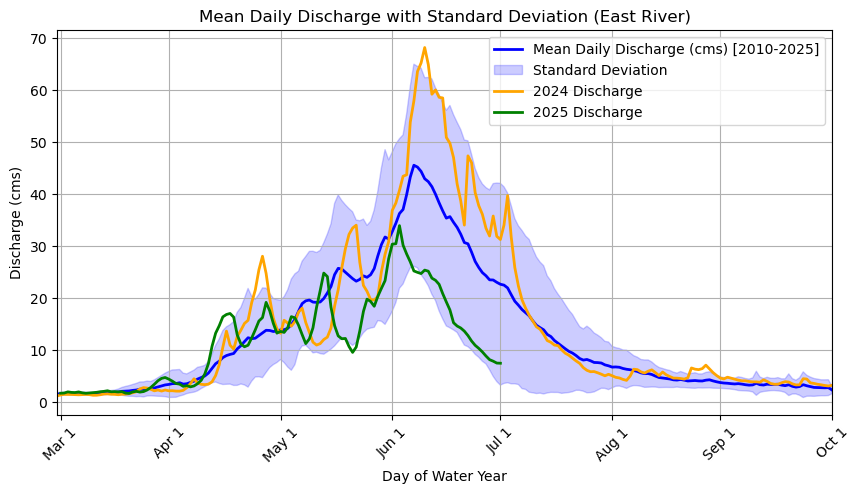

In [37]:
# plot the mean and shade the standard deviation
plt.figure(figsize=(10, 5))
plt.plot(q_er_dowy_mean.index, q_er_dowy_mean['mean'], label='Mean Daily Discharge (cms) [2010-2025]', color='blue', lw=2)
plt.fill_between(q_er_dowy_mean.index,
                 q_er_dowy_mean['mean'] - q_er_dowy_mean['std'],
                 q_er_dowy_mean['mean'] + q_er_dowy_mean['std'],
                 color='blue', alpha=0.2, label='Standard Deviation')

# add 2024 data
plt.plot(q_er_df_2024.index, q_er_df_2024['mean'], 
         label='2024 Discharge', color='orange', lw=2)
# add 2025 data
plt.plot(q_er_df_2025.index, q_er_df_2025['mean'], 
         label='2025 Discharge', color='green', lw=2)
plt.title('Mean Daily Discharge with Standard Deviation (East River)')
plt.xlabel('Day of Water Year')
plt.ylabel('Discharge (cms)')
plt.xticks(range(0, 366, 30), rotation=45)  # Show ticks for each month
# change x-ticks to be the first day of each month
plt.xticks([0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365],
           ['Oct 1', 'Nov 1', 'Dec 1', 'Jan 1', 'Feb 1', 'Mar 1', 
            'Apr 1', 'May 1', 'Jun 1', 'Jul 1', 'Aug 1', 'Sep 1', 'Oct 1'])
plt.xlim(150, 365)  # Limit x-axis to one water year
plt.grid()
plt.legend()